# Instal

In [ ]:
# !pip install sweetviz
# !pip install pycaret
# !pip install tpot

# Imports

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import numpy as np

In [48]:
df = pd.read_csv(r'tudo.csv')
df.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET,row
111243,2019-6-30,Brás,-23.5451,-46.6162,73888,37,18,10,28,4,37,39,43,NORMAL,4860
111244,2018-7-4,Moema,-23.5489,-46.6388,18709,21,23,8,37,30,35,16,33,NORMAL,16744
111245,2019-7-30,Brás,-23.5451,-46.6162,70818,86,32,65,20,8,20,38,17,NORMAL,4890
111246,2019-12-6,Vila Mariana,-23.5895,-46.6346,22373,54,20,19,31,43,31,39,43,NORMAL,14376
111247,2018-8-1,Moema,-23.5489,-46.6388,20281,9,28,33,9,43,13,37,10,REABASTECER,16771


In [49]:
df.shape

(111248, 15)

In [50]:
df.drop_duplicates(subset=['row'], inplace=True)

In [51]:
df.shape

(17007, 15)

In [54]:
df.dropna(inplace=True)

In [55]:
df.shape

(17007, 15)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17007 entries, 0 to 110766
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tempo         17007 non-null  object 
 1   Estação       17007 non-null  object 
 2   LAT           17007 non-null  float64
 3   LONG          17007 non-null  float64
 4   Movimentação  17007 non-null  int64  
 5   Original_473  17007 non-null  int64  
 6   Original_269  17007 non-null  int64  
 7   Zero          17007 non-null  int64  
 8   Maçã-Verde    17007 non-null  int64  
 9   Tangerina     17007 non-null  int64  
 10  Citrus        17007 non-null  int64  
 11  Açaí-Guaraná  17007 non-null  int64  
 12  Pêssego       17007 non-null  int64  
 13  TARGET        17007 non-null  object 
 14  row           17007 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 2.1+ MB


# SWEETVIZ

In [19]:
import sweetviz

In [ ]:
report = sweetviz.analyze(df)

In [ ]:
report.show_html('report_tnt.html')

# X e Y

In [57]:
features = ['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego']
#criando nosso X e Y
X = df[features]
Y = df.TARGET

In [41]:
X

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
0,65,16,22,39,35,39,29,31
1,7,45,16,23,26,20,26,38
2,79,36,65,13,20,16,17,31
3,46,60,42,40,30,32,11,9
4,8,37,11,33,22,32,37,43
...,...,...,...,...,...,...,...,...
106577,56,24,54,43,17,43,16,6
108479,15,15,34,22,25,17,26,28
108890,64,10,44,43,19,43,12,21
109522,50,4,36,15,11,30,38,26


In [42]:
Y

0              NORMAL
1              NORMAL
2              NORMAL
3              NORMAL
4         REABASTECER
             ...     
106577         NORMAL
108479         NORMAL
108890         NORMAL
109522         NORMAL
110766         NORMAL
Name: TARGET, Length: 17007, dtype: object

# pycaret

In [43]:
from pycaret.classification import *

In [58]:
ml_setup = setup(data = df, target='TARGET', train_size=0.8, session_id=1234,numeric_features=features)

Setup Succesfully Completed!


,Description,Value
0,session_id,1234
1,Target Type,Binary
2,Label Encoded,"NORMAL: 0, REABASTECER: 1"
3,Original Data,"(17007, 15)"
4,Missing Values,False
5,Numeric Features,12
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [60]:
compare_models(fold=10,exclude=['svm','qda','lda']) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.7719,0.8459,0.8277,0.6080,0.7010,0.5235,0.5400,0.3601
1,CatBoost Classifier,0.7641,0.8471,0.7590,0.6080,0.6750,0.4934,0.5010,13.2282
2,Decision Tree Classifier,0.7463,0.7148,0.6259,0.6035,0.6143,0.4255,0.4258,0.6031
3,Random Forest Classifier,0.7426,0.8431,0.5681,0.6085,0.5872,0.4007,0.4014,0.8778
4,Gradient Boosting Classifier,0.7229,0.8436,0.3839,0.6138,0.4722,0.2976,0.3128,15.2555
5,Extreme Gradient Boosting,0.7218,0.8439,0.3789,0.6122,0.4679,0.2935,0.3090,14.1240
6,Ada Boost Classifier,0.7112,0.8302,0.3034,0.6061,0.4042,0.2405,0.2657,4.6736
7,Extra Trees Classifier,0.6944,0.8117,0.1718,0.5940,0.2662,0.1418,0.1857,13.1938
8,Naive Bayes,0.6901,0.7266,0.1912,0.5598,0.2848,0.1441,0.1781,0.1622
9,Logistic Regression,0.6787,0.6625,0.1395,0.4610,0.2139,0.0922,0.1162,1.5246


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# TPOT

In [ ]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, verbosity=2)

In [ ]:
tpot.export('tpot2.py')

# Metricas

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [64]:
def avalia(y_test, y_pred): 
  print(accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print(confusion_matrix(y_test, y_pred))

# Pre-Processamento

In [65]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=687, test_size=0.2, stratify=Y)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13605, 8)
(3402, 8)
(13605,)
(3402,)


# Modelos

# XGBClassifier

In [186]:
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=133, test_size=0.2, stratify=Y)
XGB = XGBClassifier(learning_rate=0.001, max_depth=10, min_child_weight=18, n_estimators=100, nthread=1, subsample=0.3)

In [187]:
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=10,
              min_child_weight=18, missing=None, n_estimators=100, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)

In [188]:
y_XGB = XGB.predict(X_test)

In [189]:
avalia(y_test,y_XGB)

0.7945326278659612
              precision    recall  f1-score   support

      NORMAL       1.00      0.70      0.82      2303
 REABASTECER       0.61      1.00      0.76      1099

    accuracy                           0.79      3402
   macro avg       0.80      0.85      0.79      3402
weighted avg       0.87      0.79      0.80      3402

[[1607  696]
 [   3 1096]]


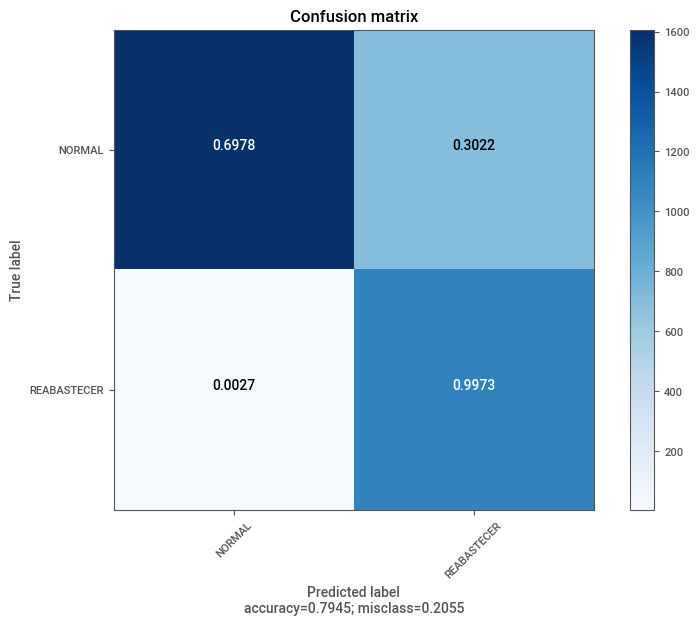

In [190]:
plot_confusion_matrix(confusion_matrix(y_test, y_XGB), ['NORMAL', 'REABASTECER'])

# LGBMClassifier

In [216]:
from lightgbm import LGBMClassifier 

X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=717, test_size=0.2, stratify=Y)

LGBM = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [217]:
LGBM.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [218]:
y_LGBM = LGBM.predict(X_test)

In [219]:
avalia(y_test,y_LGBM)

0.7739564961787184
              precision    recall  f1-score   support

      NORMAL       0.90      0.75      0.82      2303
 REABASTECER       0.61      0.83      0.70      1099

    accuracy                           0.77      3402
   macro avg       0.76      0.79      0.76      3402
weighted avg       0.81      0.77      0.78      3402

[[1722  581]
 [ 188  911]]


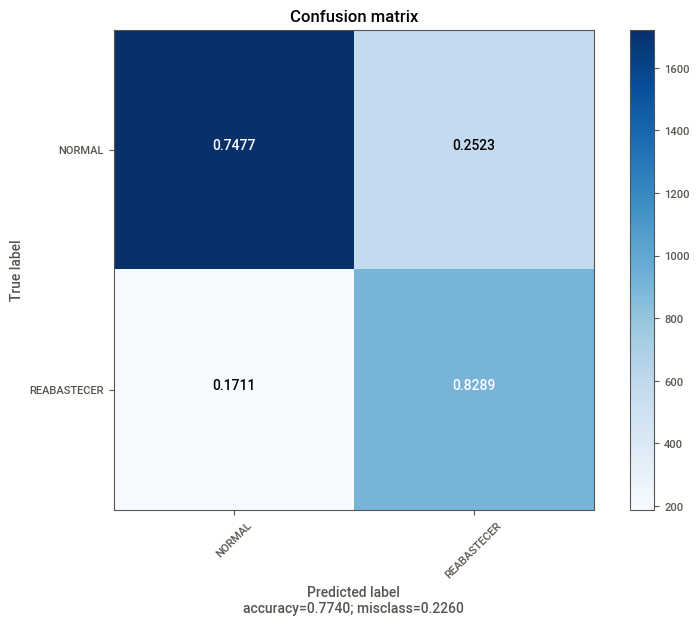

In [220]:
plot_confusion_matrix(confusion_matrix(y_test, y_LGBM), ['NORMAL', 'REABASTECER'])

 # pegando o melhor

In [138]:
for x in range(1000,2000): 
  print(x)  
  X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=x)
  
  y_XGB = XGB.fit(X_train, y_train).predict(X_test)

  y_LGBM = LGBM.fit(X_train, y_train).predict(X_test)  

  if (accuracy_score(y_test, y_XGB)*100) > 79.5:
    
    print("XGB:",accuracy_score(y_test, y_XGB)*100)

  if (accuracy_score(y_test, y_LGBM)*100) > 78.5:
  
    print("LGBM:",accuracy_score(y_test, y_LGBM)*100)
    

  print('\n')

1000


1001


1002


1003


1004


1005


1006


1007
XGB: 79.8447789275635


1008


1009


1010


1011


1012


1013


1014


1015


1016


1017


1018


1019


1020


1021


1022


1023


1024


1025


1026


1027


1028


1029


1030


1031


1032


1033


1034


1035


1036


1037


1038


1039


1040


1041


1042


1043


1044


1045


1046


1047


1048


1049


1050


1051


1052


1053


1054
XGB: 79.70366886171215


1055


1056


1057


1058


1059


1060


1061


1062


1063


1064


1065


1066


1067


1068


1069
XGB: 79.56255879586077


1070


1071


1072


1073


1074


1075


1076


1077


1078


1079


1080


1081


1082


1083


1084


1085


1086


1087


1088


1089


1090


1091
XGB: 79.68015051740358


1092


1093


1094


1095


1096


1097


1098


1099


1100


1101


1102


1103


1104


1105


1106


1107


1108


1109


1110


1111


1112
XGB: 79.82126058325494


1113


1114


1115


1116
XGB: 79.93885230479775


1117


1118


1119


1120


1121


1122


11

# Entrega

In [221]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

--2020-09-12 02:27:19--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘to_be_scored.csv’

to_be_scored.csv        [ <=>                ]  68.64K  --.-KB/s    in 0.01s   

2020-09-12 02:27:19 (5.26 MB/s) - ‘to_be_scored.csv’ saved [70291]



,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


In [222]:
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

,Tempo,Estação,LAT,LONG,Movimentação,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,2019-8-19,Hospital São Paulo,-23.5984,-46.6455,26787,34,65,28,17,33,27,6,2
980,2019-8-20,Hospital São Paulo,-23.5984,-46.6455,26629,21,60,18,15,27,22,43,43
981,2019-8-21,Hospital São Paulo,-23.5984,-46.6455,27517,9,56,13,14,21,17,37,37
982,2019-8-22,Hospital São Paulo,-23.5984,-46.6455,26860,86,49,7,14,17,12,33,33
983,2019-8-23,Hospital São Paulo,-23.5984,-46.6455,24571,74,41,65,8,14,7,27,27


In [223]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tempo         984 non-null    object 
 1   Estação       984 non-null    object 
 2   LAT           984 non-null    float64
 3   LONG          984 non-null    float64
 4   Movimentação  984 non-null    int64  
 5   Original_473  984 non-null    int64  
 6   Original_269  984 non-null    int64  
 7   Zero          984 non-null    int64  
 8   Maçã-Verde    984 non-null    int64  
 9   Tangerina     984 non-null    int64  
 10  Citrus        984 non-null    int64  
 11  Açaí-Guaraná  984 non-null    int64  
 12  Pêssego       984 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 100.1+ KB


# Classificar

In [226]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [228]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Estação'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego
979,34,65,28,17,33,27,6,2
980,21,60,18,15,27,22,43,43
981,9,56,13,14,21,17,37,37
982,86,49,7,14,17,12,33,33
983,74,41,65,8,14,7,27,27


In [230]:

df[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
].columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

In [231]:
df_to_be_scored_4.columns

Index(['Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'],
      dtype='object')

In [232]:

y_pred = LGBM.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

,Original_473,Original_269,Zero,Maçã-Verde,Tangerina,Citrus,Açaí-Guaraná,Pêssego,TARGET
979,34,65,28,17,33,27,6,2,REABASTECER
980,21,60,18,15,27,22,43,43,NORMAL
981,9,56,13,14,21,17,37,37,REABASTECER
982,86,49,7,14,17,12,33,33,REABASTECER
983,74,41,65,8,14,7,27,27,NORMAL


In [233]:
#project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))
df_to_be_scored_4.to_csv('results.csv',index=False)